# Solutions for mini-project
**Zihan Chen**, zc366, [GitHub Repo: EMNIST-Naive-Bayes](https://github.com/Cesartwothousands/EMNIST-Naive-Bayes)

## 1. Visualizing the EMNIST Dataset
### 1.1. Loading the EMNIST Dataset
I initially relied on the emnist_project.py script to fetch the dataset. However, for this project, I've renamed it to load_dataset.py and pruned unnecessary imports. I will use a balanced version of the dataset, which requires setting the `split` parameter to `balanced`. This version provides \( C = 47 \) distinct classes. Despite the name "balanced," the dataset may not always have a uniform distribution among classes. Therefore, I should still take into account the class distribution \( P(C_k) \) when building subsequent models.

The following table shows the size of each file in the dataset. Then I will implement the visualization of the dataset.

| Filename                                     | Size(KB)      |
|----------------------------------------------|---------------|
| `emnist-balanced-test-images-idx3-ubyte`     | 14,739,216    |
| `emnist-balanced-test-labels-idx1-ubyte`     | 18,808        |
| `emnist-balanced-train-images-idx3-ubyte`    | 88,435,216    |
| `emnist-balanced-train-labels-idx1-ubyte`    | 112,808       |
| `emnist-byclass-test-images-idx3-ubyte`      | 91,197,248    |
| `emnist-byclass-test-labels-idx1-ubyte`      | 116,331       |
| `emnist-byclass-train-images-idx3-ubyte`     | 547,178,704   |
| `emnist-byclass-train-labels-idx1-ubyte`     | 697,940       |
| `emnist-bymerge-test-images-idx3-ubyte`      | 91,197,248    |
| `emnist-bymerge-test-labels-idx1-ubyte`      | 116,331       |
| `emnist-bymerge-train-images-idx3-ubyte`     | 547,178,704   |
| `emnist-bymerge-train-labels-idx1-ubyte`     | 697,940       |
| `emnist-digits-test-images-idx3-ubyte`       | 31,360,016    |
| `emnist-digits-test-labels-idx1-ubyte`       | 40,008        |
| `emnist-digits-train-images-idx3-ubyte`      | 188,160,016   |
| `emnist-digits-train-labels-idx1-ubyte`      | 240,008       |
| `emnist-letters-test-images-idx3-ubyte`      | 16,307,216    |
| `emnist-letters-test-labels-idx1-ubyte`      | 20,808        |
| `emnist-letters-train-images-idx3-ubyte`     | 97,843,216    |
| `emnist-letters-train-labels-idx1-ubyte`     | 124,808       |
| `emnist-mnist-test-images-idx3-ubyte`        | 7,840,016     |
| `emnist-mnist-test-labels-idx1-ubyte`        | 10,008        |
| `emnist-mnist-train-images-idx3-ubyte`       | 47,040,016    |
| `emnist-mnist-train-labels-idx1-ubyte`       | 60,008        |
| **Total**                                    | 1,770,732,638 |

### 1.2. Visualizing the Dataset
I began by establishing a key-value mapping for the multiple EMNIST datasets. Each key, such as 'balanced-test', corresponds to a set of image and label filenames.

The program then converts these IDX files into numpy arrays using the `idx2numpy` library, streamlining data manipulation.

To visualize the data, unique character IDs are identified using `np.unique(labels)`. For each ID, 5 random samples are selected with `np.random.choice`.

Using Matplotlib, a grid is formed with rows equal to the sample count (5) and columns corresponding to unique character IDs.

Each image undergoes two transformations for display: 
1. It's horizontally flipped using `np.fliplr()`.
2. Rotated by 90 degrees with `np.rot90()`.

The character ID serves as the column title, displayed only on the top row.

After fine-tuning the layout with `plt.tight_layout()`, the visual representation of each dataset is saved as a PDF, which can be found attached in the project, the code is shown below and also attached as `dataset_visualization.py` in the project folder.

Visualizing balanced-test...


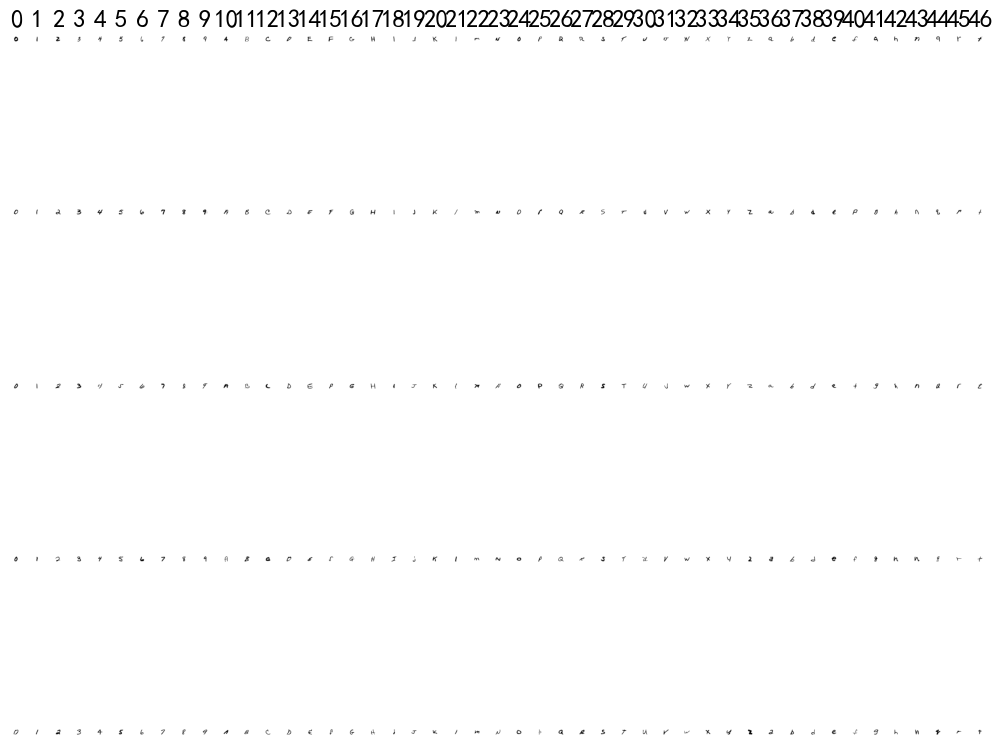

Visualizing balanced-train...


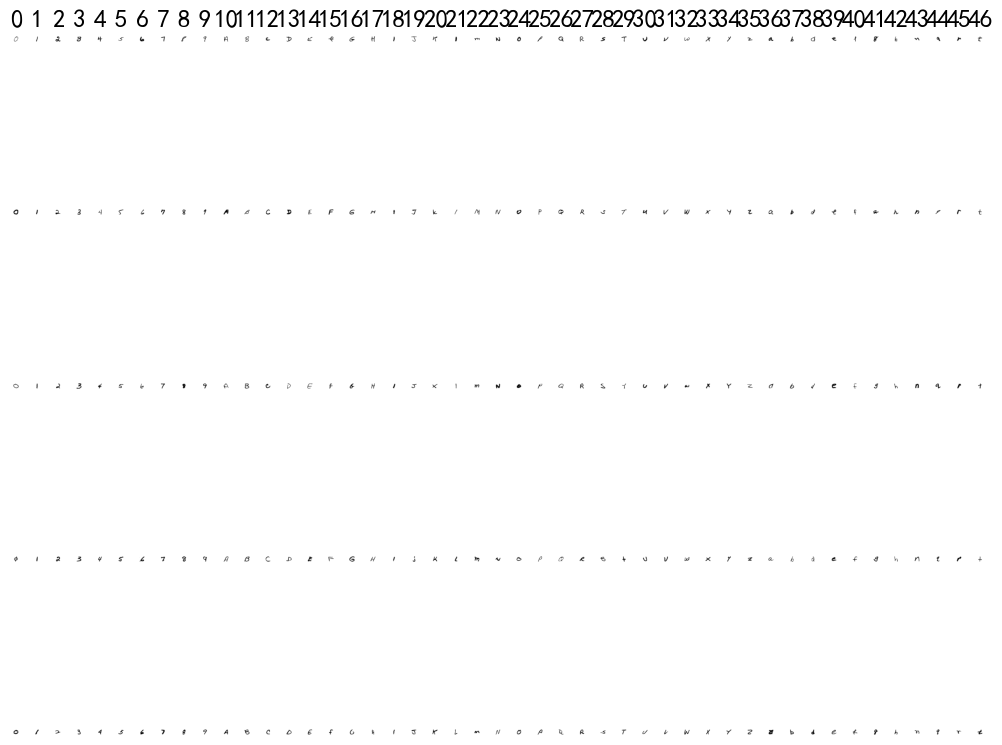

Visualizing byclass-test...


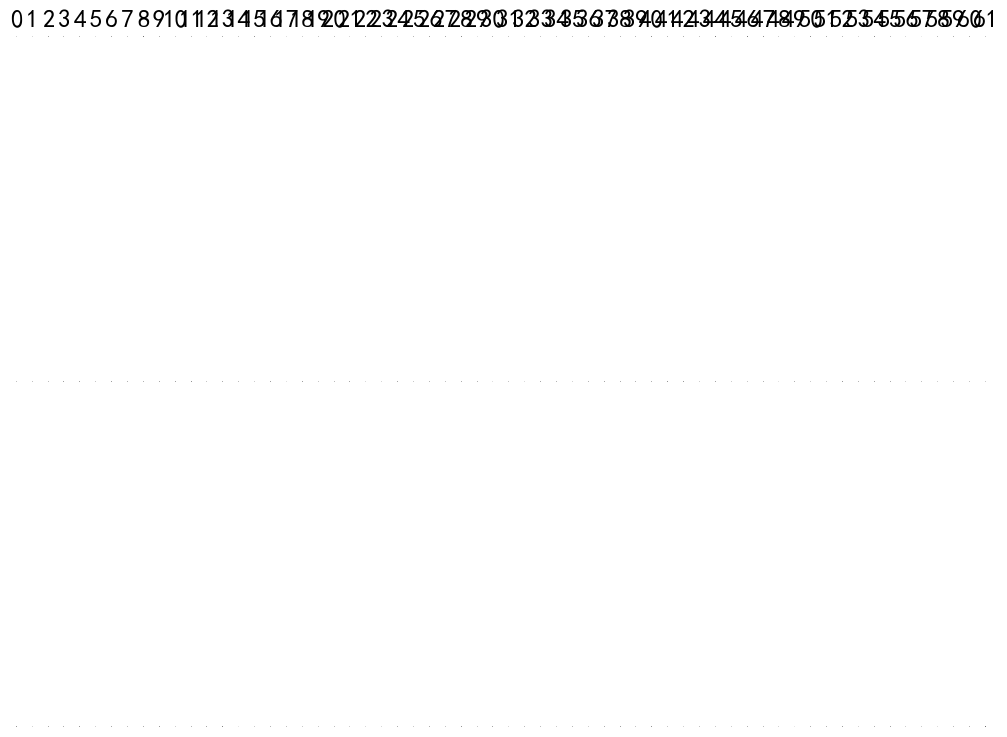

Visualizing byclass-train...


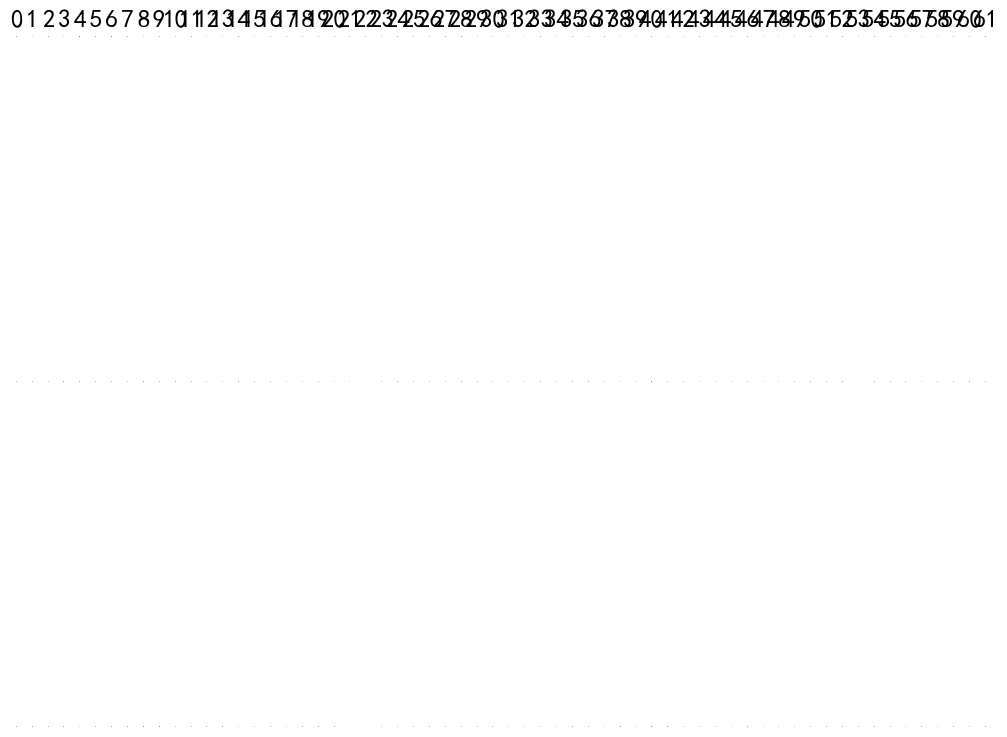

Visualizing bymerge-test...


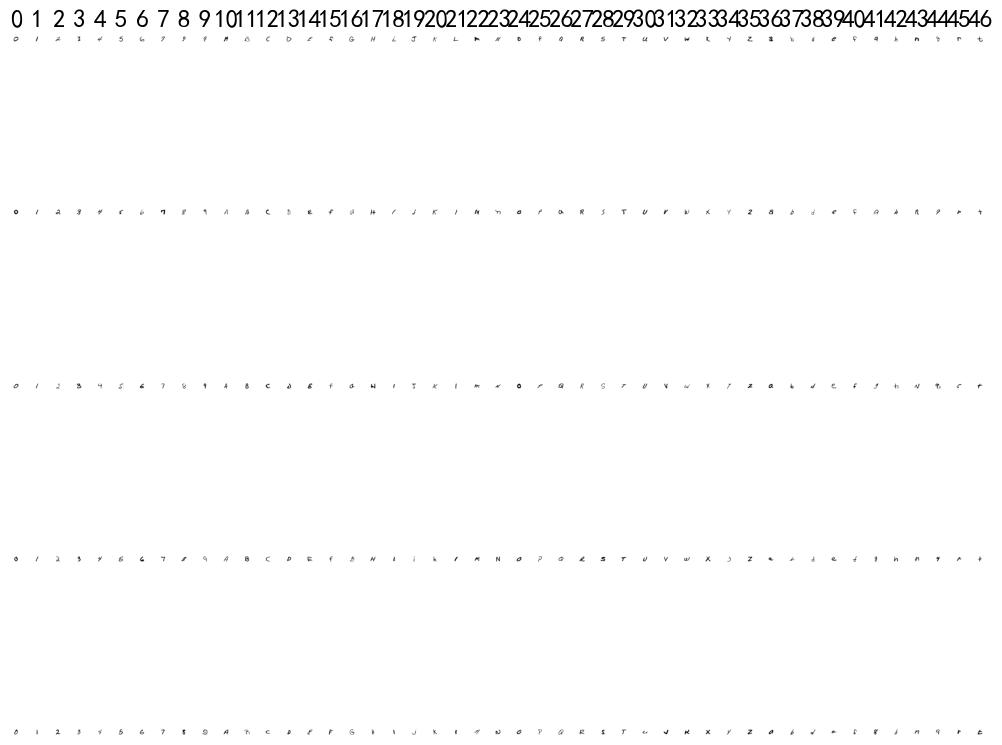

Visualizing bymerge-train...


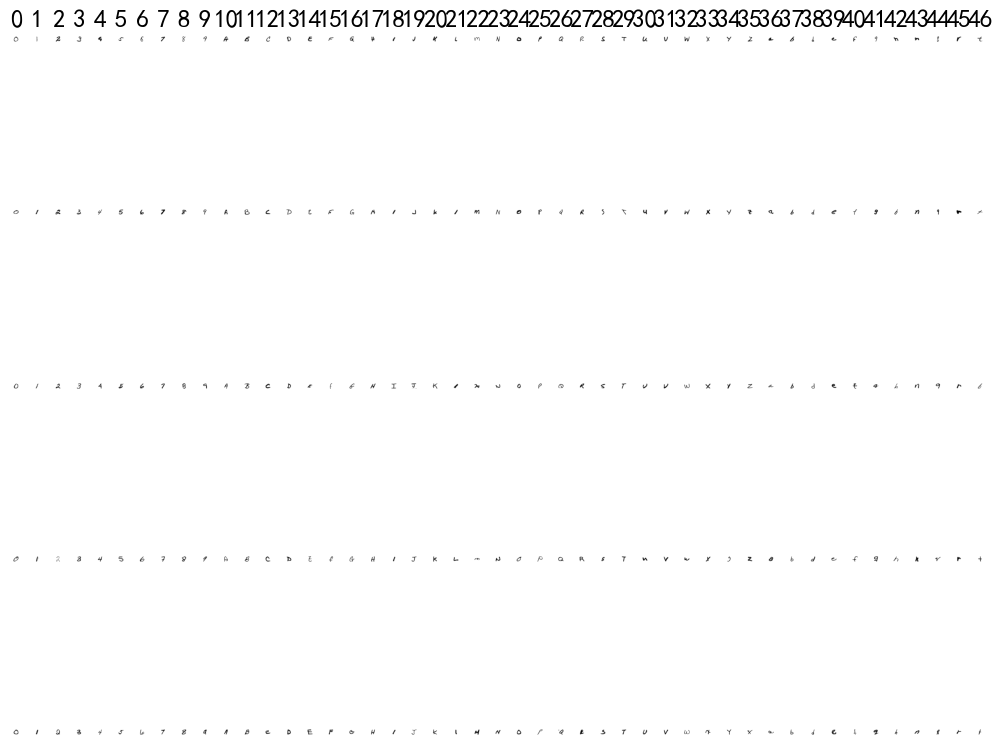

Visualizing digits-test...


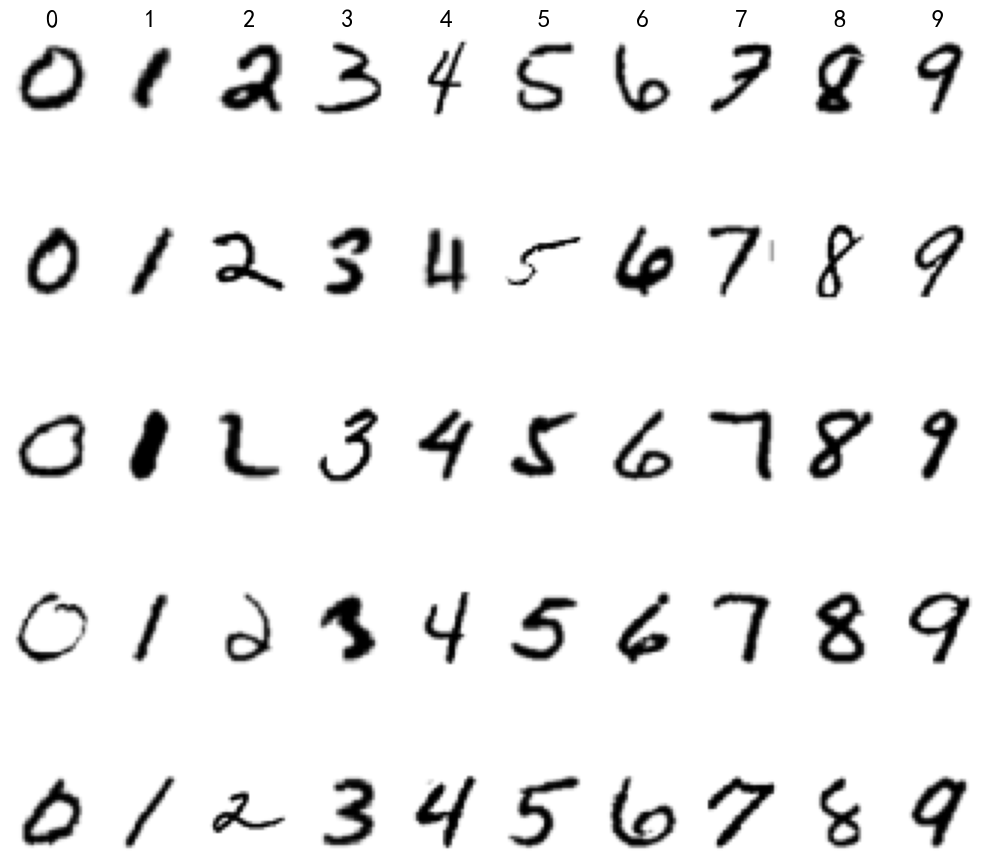

Visualizing digits-train...


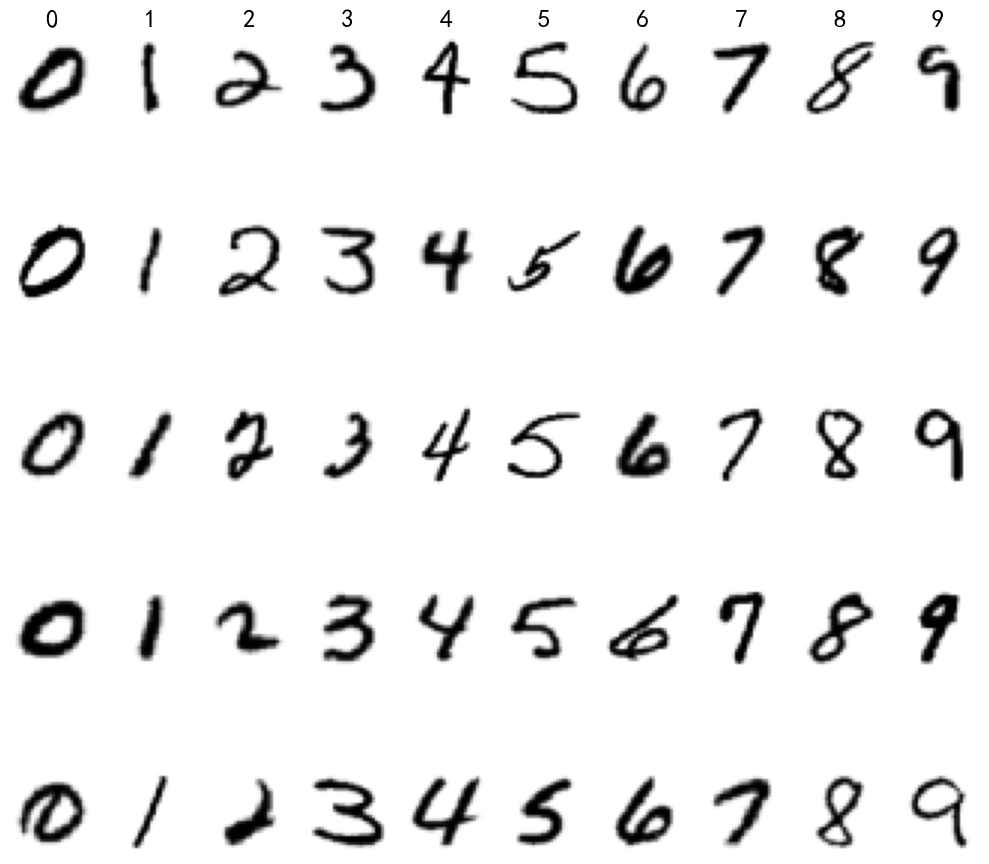

Visualizing letters-test...


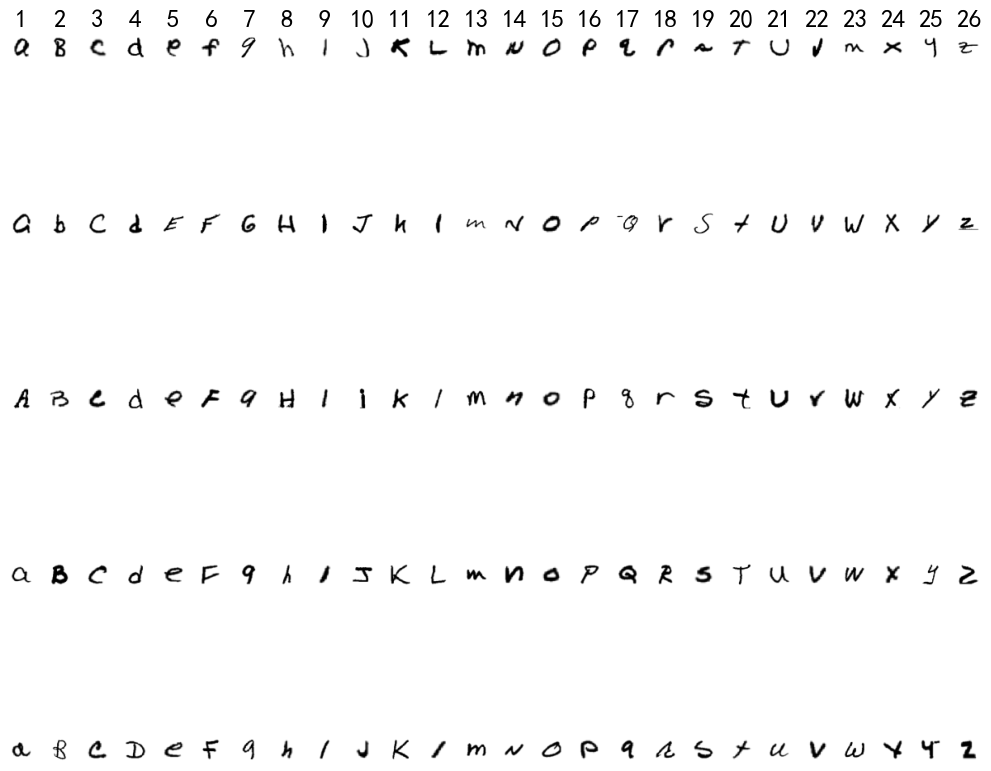

Visualizing letters-train...


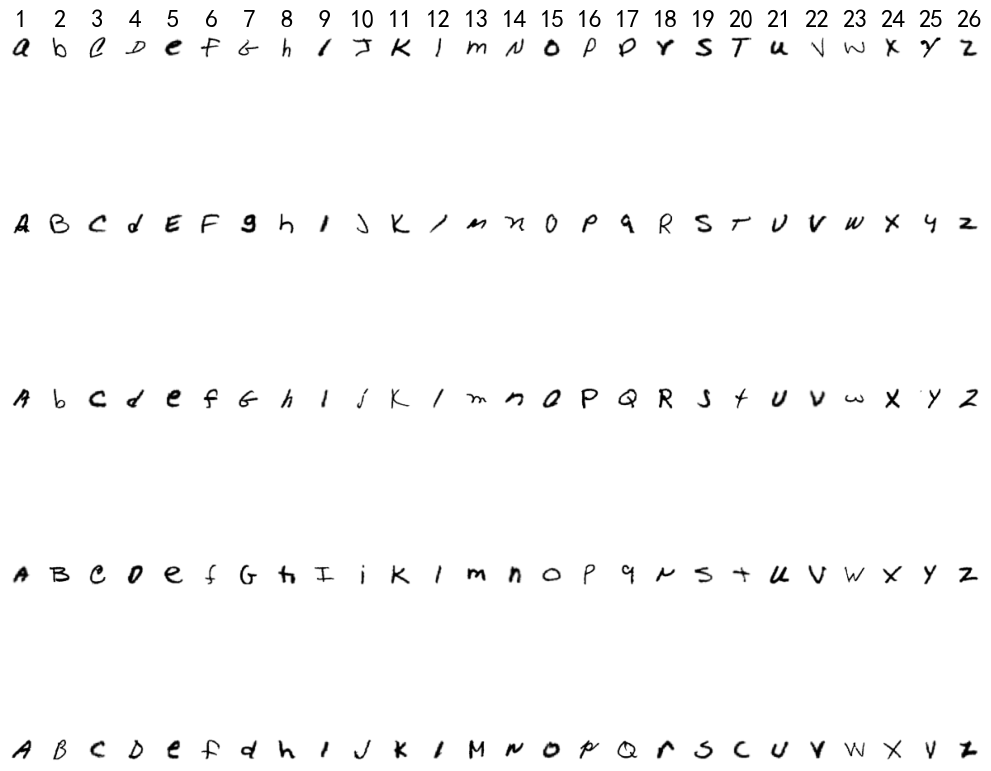

Visualizing mnist-test...


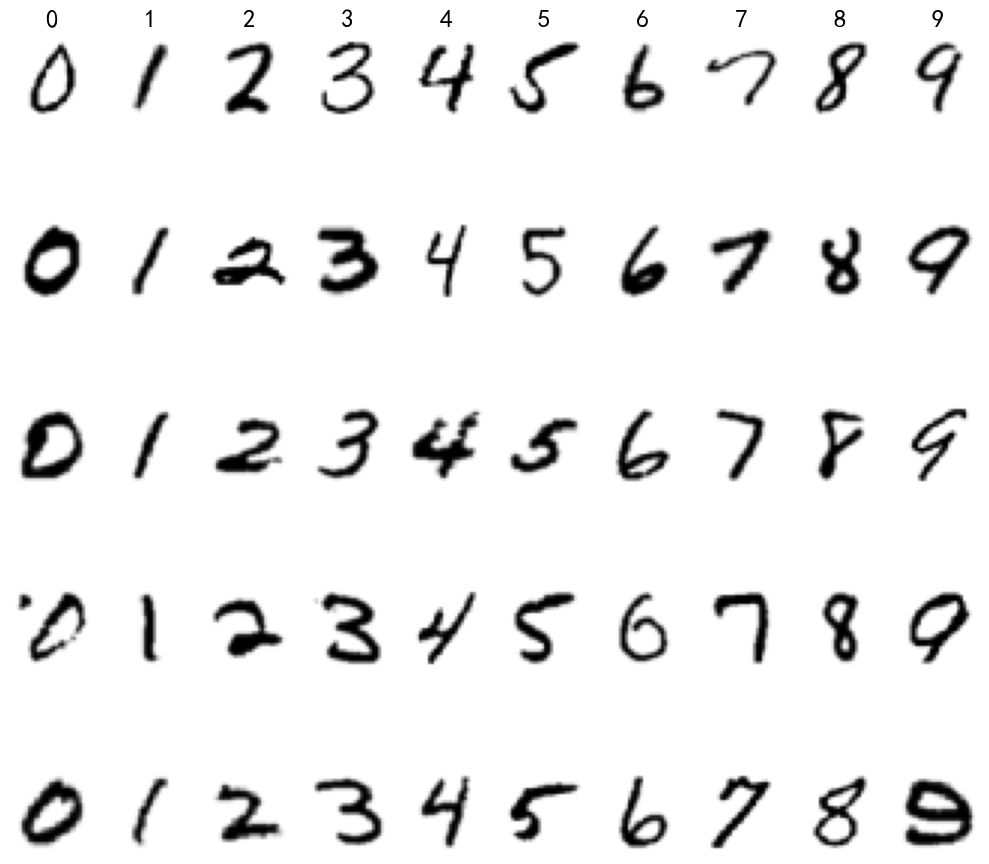

Visualizing mnist-train...


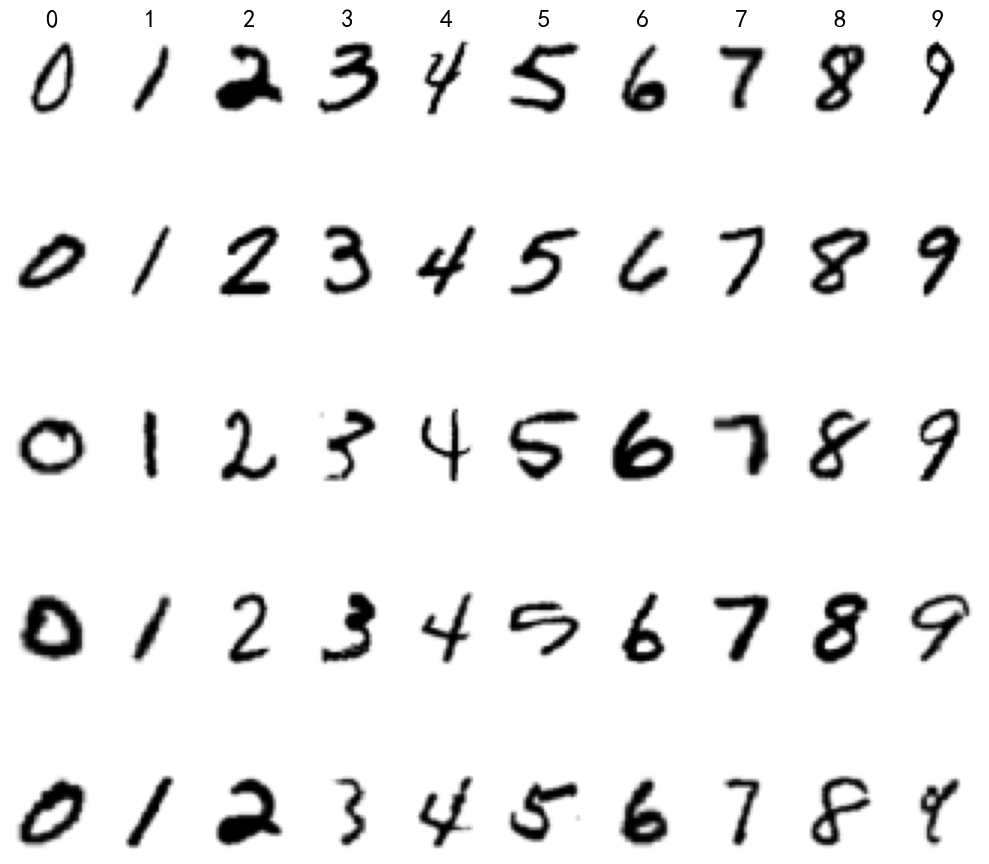

In [15]:
import idx2numpy
import matplotlib.pyplot as plt
import os
import numpy as np

# initialize the data directory
data_dir = r'C:\aCesar\F_File\MSCS\CS535_Machie Learning I\mini-project\EMNIST-Naive-Bayes\dataset\EMNIST\raw'
pdf_output_path = r'C:\aCesar\F_File\MSCS\CS535_Machie Learning I\mini-project\EMNIST-Naive-Bayes\dataset\EMNIST\pdf_output'

# map the file names and their corresponding labels
datasets = {
    'balanced-test':('emnist-balanced-test-images-idx3-ubyte', 'emnist-balanced-test-labels-idx1-ubyte'),
    'balanced-train':('emnist-balanced-train-images-idx3-ubyte', 'emnist-balanced-train-labels-idx1-ubyte'),
    'byclass-test':('emnist-byclass-test-images-idx3-ubyte', 'emnist-byclass-test-labels-idx1-ubyte'),
    'byclass-train':('emnist-byclass-train-images-idx3-ubyte', 'emnist-byclass-train-labels-idx1-ubyte'),
    'bymerge-test':('emnist-bymerge-test-images-idx3-ubyte', 'emnist-bymerge-test-labels-idx1-ubyte'),
    'bymerge-train':('emnist-bymerge-train-images-idx3-ubyte', 'emnist-bymerge-train-labels-idx1-ubyte'),
    'digits-test':('emnist-digits-test-images-idx3-ubyte', 'emnist-digits-test-labels-idx1-ubyte'),
    'digits-train':('emnist-digits-train-images-idx3-ubyte', 'emnist-digits-train-labels-idx1-ubyte'),
    'letters-test':('emnist-letters-test-images-idx3-ubyte', 'emnist-letters-test-labels-idx1-ubyte'),
    'letters-train':('emnist-letters-train-images-idx3-ubyte', 'emnist-letters-train-labels-idx1-ubyte'),
    'mnist-test':('emnist-mnist-test-images-idx3-ubyte', 'emnist-mnist-test-labels-idx1-ubyte'),
    'mnist-train':('emnist-mnist-train-images-idx3-ubyte', 'emnist-mnist-train-labels-idx1-ubyte'),
}

def visualize_dataset(image_file, label_file):
    # Convert the idx files to numpy arrays
    images = idx2numpy.convert_from_file(image_file)
    labels = idx2numpy.convert_from_file(label_file)
    
    # Define the number of samples and character IDs
    num_samples_per_char = 5
    unique_char_ids = np.unique(labels)

    # Initialize the figure for visualization
    figure = plt.figure(figsize=(10, 10))
    cols = len(unique_char_ids)
    rows = num_samples_per_char

    for j, char_id in enumerate(unique_char_ids):
        idxs = np.where(labels == char_id)[0]
        random_idxs = np.random.choice(idxs, num_samples_per_char, replace=False)

        for i in range(num_samples_per_char):
            ax = figure.add_subplot(rows, cols, i*cols + j + 1)
            
            # First, flip the image horizontally and then rotate it by 90 degrees
            img = np.rot90(np.fliplr(images[random_idxs[i]]))
            
            if i == 0:
                ax.set_title(str(char_id), fontsize=18)
            ax.imshow(img, cmap=plt.cm.binary)
            ax.axis("off")

    # Adjust layout and save the visualization as a PDF
    plt.tight_layout()
    plt.savefig(os.path.join(pdf_output_path, f"emnist-{os.path.basename(image_file)}.pdf"), bbox_inches='tight')
    plt.show()

for dataset_name, (img_file, lbl_file) in datasets.items():
    print(f"Visualizing {dataset_name}...")
    img_path = os.path.join(data_dir, img_file)
    lbl_path = os.path.join(data_dir, lbl_file)
    visualize_dataset(img_path, lbl_path)

## 2. Building a Model
In order to build a conditional Categorical Naive Bayes model, I need to assume that all pixels are independent binary RVs. I will use `scikit-learn`'s Estimator object to build the model. 

For priors of the class distribution, I will assume Dirichlet priors with a uniform distribution. This is equivalent to assuming a uniform distribution for the class distribution. 

For priors of each pixel, I will assume Beta priors, which is equivalent to assuming a uniform distribution for each pixel.

### 2.1. Implement two learning paradigms
To implement Maximum Likelihood Estimation (MLE) and Maximum A Posteriori Estimation  (MAP) for the Categorical Naive Bayes, it needs to estimate the probabilities of the features (pixels) for each class.

For Maximum Likelihood Estimation (**MLE**):

$$ 
P(x_i = 1 \mid y = c) = \frac{N_1}{N_1 + N_2}
$$

For Maximum A Posteriori Estimation (**MAP**) with Beta priors for each pixel:

$$ 
P(x_i = 1 \mid y = c) = \frac{N_1 + \alpha - 1}{N_1 + N_2 + \alpha + \beta - 2}
$$

### 2.2. Implement predictive models based on each type of learning
Given the learned parameters, I'll compute the posterior probabilities for each class given a new data point and predict the class with the highest probability.

### 2.3. Implement the scoring methods for the two models
Implement the scoring methods for the two models as Estimate Score/Model method.
$$
\text{Score}_{MLE} = \frac{1}{|D|} \log p(D | \Theta_{MLE})
$$

$$
\text{Score}_{MAP} = \frac{1}{|D|} \log p(D | \Theta_{MAP})
$$


In [1]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
from models.load_data import load_data


class CategoricalNaiveBayes(BaseEstimator, ClassifierMixin):
    def __init__(self, alpha=1, beta=1, method="MLE"):
        self.alpha = alpha  # hyperparameter for MAP estimation of class probabilities
        self.beta = beta  # hyperparameter for MAP estimation of pixel probabilities
        self.method = method  # Estimation method: "MLE" or "MAP"

        # Initialization of class related attributes
        self.classes_ = None  # A list of unique classes in the dataset
        self.class_probs_ = None  # List containing probabilities of each class
        self.pixel_probs_ = None  # Dictionary with classes as keys and pixel probabilities as values

        # Internal variable to store probabilities from the latest prediction
        self._latest_probs = None

    # Task 1: Build a Fit Method using MLE and MAP for model parameters
    def fit(self, X, y):
        self.classes_ = np.unique(y)

        # Estimate class probabilities
        class_counts = np.array([np.sum(y == c) for c in self.classes_])
        total_samples = len(y)

        if self.method == "MLE":
            self.class_probs_ = class_counts / total_samples
        elif self.method == "MAP":
            self.class_probs_ = (class_counts + self.alpha - 1) / (total_samples + len(self.classes_) * self.alpha)

        # Estimate pixel probabilities
        if self.method == "MLE":
            self.class_probs_ = [np.mean(y == c) for c in self.classes_]
            self.pixel_probs_ = {c: np.mean(X[y == c], axis=0) for c in self.classes_}
        elif self.method == "MAP":
            self.class_probs_ = [(np.sum(y == c) + self.alpha - 1) / (len(y) + len(self.classes_) * (self.alpha - 1))
                                 for c in self.classes_]
            self.pixel_probs_ = {c: (np.sum(X[y == c], axis=0) + self.beta - 1) / (np.sum(y == c) + 2 * (self.beta - 1))
                                 for c in self.classes_}

    # Task 2: Build a Predict Method using MLE and MAP for model parameters
    def predict(self, X):
        epsilon = 1e-10  # Small constant to prevent division by zero
        min_prob = 1e-200  # Threshold to prevent very small probability product
        all_probs = []

        for x in X:
            probs = []
            for c in self.classes_:
                prob = self.class_probs_[self.classes_.tolist().index(c)]
                for idx, pixel in enumerate(x):
                    prob *= self.pixel_probs_[c][idx] * pixel + (1 - self.pixel_probs_[c][idx]) * (1 - pixel)
                    prob = max(prob, min_prob)  # Ensure the probability does not get too small
                probs.append(prob)

            probs_sum = sum(probs)
            if probs_sum <= epsilon:  # Avoid division by zero or a very small number
                probs_sum += epsilon
            normalized_probs = [p / probs_sum for p in probs]
            all_probs.append(normalized_probs)

        self._latest_probs = all_probs
        return [self.classes_[np.argmax(probs)] for probs in all_probs]

    # Task 3: Build a Score Method using MLE and MAP for model parameters
    def score(self, X, y):
        # Make predictions to get the latest probabilities
        self.predict(X)

        # Compute the average log likelihood of the data
        log_likelihoods = [np.log(max(prob)) for prob in self._latest_probs]
        avg_log_likelihood = np.mean(log_likelihoods)

        return avg_log_likelihood

Then, I will use a load_data function to load the dataset which is already download in the disk and use some simple sample subset to test the model.

In [2]:
import idx2numpy
import os


def load_data(dataset_type='balanced', data_type='train'):
    # Define the file paths based on dataset_type and data_type
    images_file = f"C:\\aCesar\\F_File\\MSCS\\CS535_Machie Learning I\\mini-project\\data\\EMNIST\\raw\\emnist-{dataset_type}-{data_type}-images-idx3-ubyte"
    labels_file = f"C:\\aCesar\\F_File\\MSCS\\CS535_Machie Learning I\\mini-project\\data\\EMNIST\\raw\\emnist-{dataset_type}-{data_type}-labels-idx1-ubyte"

    # Ensure files exist
    if not os.path.exists(images_file) or not os.path.exists(labels_file):
        raise ValueError(f"Files related to {dataset_type} and {data_type} not found!")

    # Convert idx files to numpy arrays
    X = idx2numpy.convert_from_file(images_file)
    y = idx2numpy.convert_from_file(labels_file)
    X = X.reshape(X.shape[0], X.shape[1] * X.shape[2])
    # print(X.shape, y.shape)

    return X, y

In [3]:
# To load 'balanced' data:
X_train, y_train = load_data('balanced', 'train')
X_test, y_test = load_data('balanced', 'test')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# Initialize the Naive Bayes Classifier
clf_mle = CategoricalNaiveBayes(method="MLE")
clf_map = CategoricalNaiveBayes(method="MAP")

# Fit the model
clf_mle.fit(X_train, y_train)
clf_map.fit(X_train, y_train)

# Predict and score on a subset of the data for testing
for n_samples in [10, 100, 250]:
    X_subset = X_test[:n_samples]
    y_subset = y_test[:n_samples]
    # print(f"Subset {X_subset}")
    # print(f"Subset {y_subset}")
    predictions_mle = clf_mle.predict(X_subset)
    predictions_map = clf_map.predict(X_subset)
    score_mle = clf_mle.score(X_subset, y_subset)
    score_map = clf_map.score(X_subset, y_subset)

    # print(f"Sample of subset: {y_subset}")
    # print(f"Predictions of subset: {predictions_mle}")
    print(f"Score for MLE {n_samples} samples: {score_mle:.4f}")
    print(f"Score for MAP {n_samples} samples: {score_map:.4f}")

(112800, 784) (112800,) (18800, 784) (18800,)
Score for MLE 10 samples: -435.0358
Score for MAP 10 samples: -435.0358


C:\Users\cesar\AppData\Local\Temp\ipykernel_5592\1202381531.py:54: RuntimeWarning: overflow encountered in scalar multiply
  prob *= self.pixel_probs_[c][idx] * pixel + (1 - self.pixel_probs_[c][idx]) * (1 - pixel)


Score for MLE 100 samples: -431.7698
Score for MAP 100 samples: -431.7698
Score for MLE 250 samples: -433.3152
Score for MAP 250 samples: -433.3152
